# <p style="background-color:green; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:10px 30px;">Capstone Project | Insurance Customer Response Prediction</p>

###  <u>  Introduction <u>

This project aims to leverage machine learning to predict customer responses to insurance policy offers, based on customer and policy features. Understanding customer behavior is critical in the insurance industry, as it directly impacts the effectiveness of targeted marketing and sales strategies. By analyzing customer demographics, vehicle information, and past behavior, we seek to build a robust model that can accurately forecast the likelihood of a positive customer response.

The outcome of this project will allow insurance companies to:

* Enhance customer insights: Identify key factors that influence customer decisions.
* Optimize sales channels: Tailor marketing and resource allocation to the most effective channels.
* Increase conversion rates: Provide more personalized offers based on predicted customer behavior.
  
This notebook will document the end-to-end machine learning pipeline, including:

1. Exploratory Data Analysis (EDA): Understanding the data and key patterns.
2. Data Preprocessing: Handling missing values, encoding categorical variables, and feature scaling.
3. Feature Engineering: Creating new features and assessing their importance.
4. Modeling: Comparing various classification models such as Logistic Regression, Decision Trees, Random Forests, and XGBoost.
5. Performance Evaluation: Assessing models using metrics like Accuracy, Precision, Recall, F1-Score, and ROC-AUC.
6. Visualization: Visualizing important insights and model performance.

By the end of this project, we aim to develop a machine learning model that can be integrated into the insurance sales process, helping to make data-driven decisions that improve marketing efficiency and overall business performance.

## Dataset Description

Variable|Variable Description
:-----|:-----
Id|Unique identifier for each record.
Gender|Gender of the individual.
Age|Age of the individual.
Driving_License|Indicates if the person has a driving license (1: Yes, 0: No).
Region_Code|Code representing the individual's region.
Previously_Insured|Whether the person was previously insured (1: Yes, 0: No).
Vehicle_Age|Age of the vehicle (categories: > 2 Years, 1-2 Year, < 1 Year).
Vehicle_Damage|Whether the vehicle was damaged (Yes/No).
Annual_Premium|Premium paid by the individual.
Policy_Sales_Channel|Code for the sales channel through which the policy was sold.
Vintage|Number of days the individual has been associated with the company.
Response|Whether the person responded to a policy offer (1: Yes, 0: No).

Let's Start

## Step 1: Importing Libraries

In [4]:
import numpy as np
import pandas as pd

# Packages for Ploting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Importing the ML Algorithm Packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Importing the Matrics and Other Required Packages
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 300)
sns.set()

## Step 2: Loading the dataset

In [9]:
# Full path to your CSV file
file_path = r'C:\\Users\\rashi\\OneDrive\\Desktop\\BIA\\Capstone Project\\data.csv'


# Load the CSV file
df = pd.read_csv(file_path)

## Step 3: Data Preprocessing & EDA

In [17]:
# To Know the Type of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [19]:
# Display the first few rows
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [21]:
# Display the last few rows
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0
381108,381109,Male,46,1,29,0,1-2 Year,No,41777,26,237,0


In [23]:
# To get the Total Rows and Columns
df.shape

(381109, 12)

In [25]:
# Generate descriptive statistics
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [27]:
# Check for missing value
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [29]:
# Copying the Main Data from csv to a New Varable DF1
df1 = df.copy()

### Intepretation
### As part of the analysis, 'ID' does not play much significant role for better performance of algorithms in training and testing data set.

In [32]:
# Removing 'id' from df1
df1 = df.drop(['id'],axis = 1)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Gender                381109 non-null  object
 1   Age                   381109 non-null  int64 
 2   Driving_License       381109 non-null  int64 
 3   Region_Code           381109 non-null  int64 
 4   Previously_Insured    381109 non-null  int64 
 5   Vehicle_Age           381109 non-null  object
 6   Vehicle_Damage        381109 non-null  object
 7   Annual_Premium        381109 non-null  int64 
 8   Policy_Sales_Channel  381109 non-null  int64 
 9   Vintage               381109 non-null  int64 
 10  Response              381109 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 32.0+ MB


In [36]:
df1.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [38]:
# Cleaning and encoding categorical data to numerical for model training and further analysis
df_train = pd.read_csv(file_path)
df1 = df_train.copy()
df1['Gender'] = df1['Gender'].map({'Male': 1, 'Female': 0})
df1['Vehicle_Age'] = df1['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
df1['Vehicle_Damage'] = df1['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
df1['Policy_Sales_Channel'] = df1['Policy_Sales_Channel'].astype(int)
df1['Region_Code'] = df1['Region_Code'].astype(int)  
df1['Response'] = df1['Response'].astype(int)
df1['Vehicle_Age'] = df1['Vehicle_Age'].astype(int)

##  Target Variable

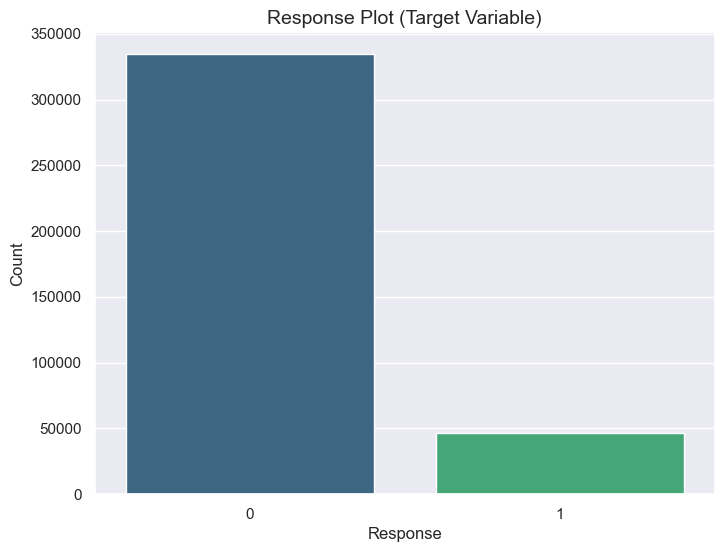

Percentage of target class

Response
0    87.743664
1    12.256336
Name: proportion, dtype: float64


In [41]:
# Plot count of each target class (Response)
plt.figure(figsize=(8, 6))
sns.countplot(x=df1['Response'], palette='viridis')
plt.title("Response Plot (Target Variable)", fontsize=14)
plt.xlabel("Response", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Print percentage of each target class
print("Percentage of target class\n")
print(df1['Response'].value_counts(normalize=True) * 100)

### The target variable is disproportionate and will affect the accuracy of the classification algorithm. 
### The target variable needs to be rebalanced before we can proceed with our machine learning algorithm.

In [44]:
# DataFrame With All 1s in Response
df_once = df1[df1['Response'] == 1]

# DataFrame With All 0s Response
df_zeros = df1[df1['Response'] == 0]

# Takeing a random sample from df_zeros(0s) to a length of df_once(1s)
Zero_Resampling = df_zeros.sample(n = len(df_once))

# Concat(joining) df_once and Zero_Resampling
New_df = pd.concat([df_once,Zero_Resampling])

# Shuffleing the New_df
final_df = shuffle(New_df)

In [46]:
Responses_count = [len(final_df[final_df.Response == 1]),len(final_df[final_df.Response == 0])]
Responses_count

[46710, 46710]

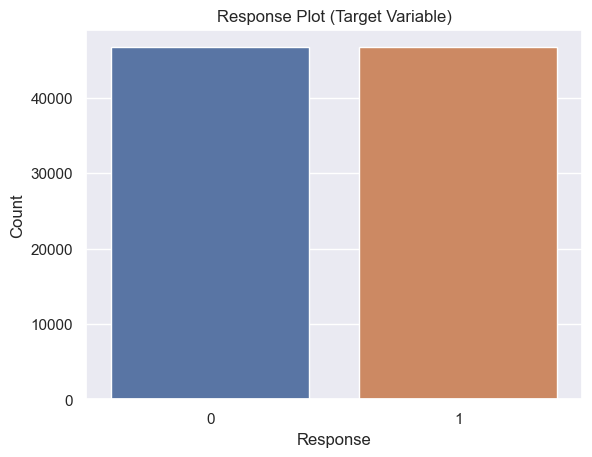

In [48]:
# Plot the count plot
sns.countplot(x=final_df['Response'])

# Add titles and labels
plt.title("Response Plot (Target Variable)")
plt.xlabel("Response")
plt.ylabel("Count")

# Show the plot
plt.show()

## Gender Variable

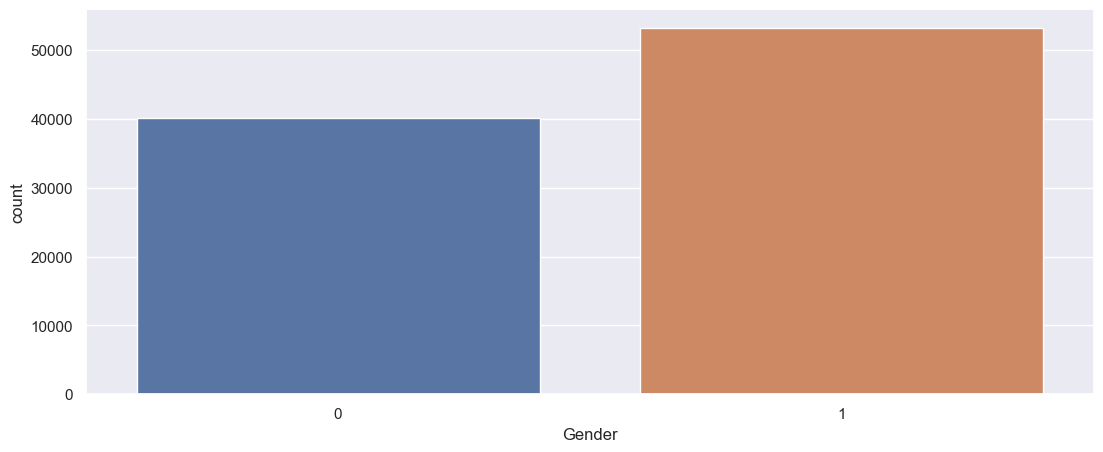

In [51]:
# Set figure size
plt.figure(figsize=(13, 5))

# Plot the count plot for the 'Gender' column
sns.countplot(x=final_df['Gender'])

# Show the plot
plt.show()

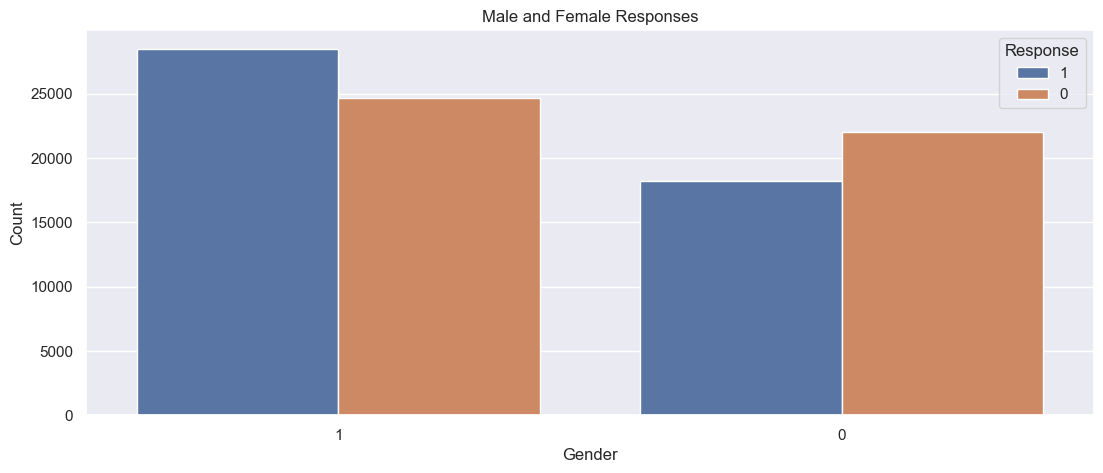

In [53]:
# Convert Gender and Response columns to categorical types if they are not already
final_df['Gender'] = final_df['Gender'].astype(str)
final_df['Response'] = final_df['Response'].astype(str)

# Set the figure size
plt.figure(figsize=(13, 5))

# Plot the count plot for 'Gender' with 'Response' as hue
sns.countplot(x=final_df['Gender'], hue=final_df['Response'])

# Add title and labels
plt.title("Male and Female Responses")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

## Annual Premium Variable

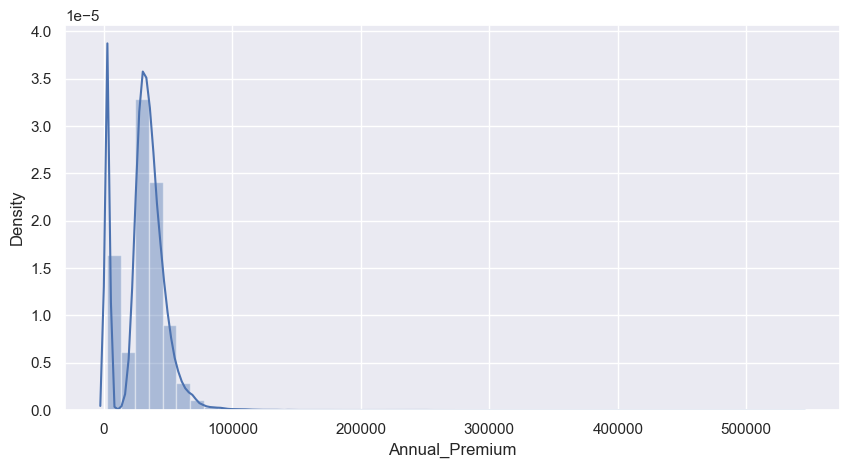

In [56]:
# Ploting a Distibution Plot for Annual_Premium
plt.figure(figsize=(10,5))
Annual_Premium_plot = sns.distplot(final_df.Annual_Premium)

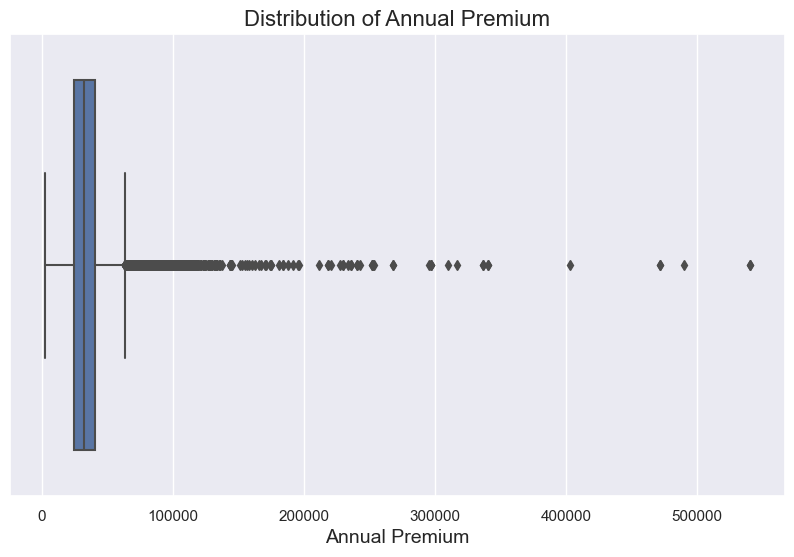

In [58]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x=final_df['Annual_Premium'])

# Add labels and title
plt.title('Distribution of Annual Premium', fontsize=16)
plt.xlabel('Annual Premium', fontsize=14)

# Display the plot
plt.show()

## This skewness indicates the presence of outliers or extreme values, which could impact statistical analyses or machine learning models.
## We are performing a log transform on Annual_premium since to remove the skewness and for better distribution

In [61]:
final_df['Log_Annual_Premium'] = np.log(final_df['Annual_Premium'])
final_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Log_Annual_Premium
125327,125328,1,56,1,29,0,1,1,2630,157,49,1,7.874739
255322,255323,1,30,1,29,1,0,0,21748,152,122,0,9.987277
105983,105984,0,28,1,28,0,0,1,48713,26,82,1,10.793701
326219,326220,1,38,1,28,0,1,1,45136,109,197,1,10.717435
16808,16809,1,42,1,12,0,1,1,24560,155,298,0,10.108874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155117,155118,0,24,1,8,1,0,0,37322,152,125,0,10.527338
319371,319372,1,27,1,28,0,1,1,35326,124,88,0,10.472375
220754,220755,1,40,1,18,1,1,0,2630,124,114,0,7.874739
348764,348765,0,26,1,45,0,0,1,2630,160,193,1,7.874739


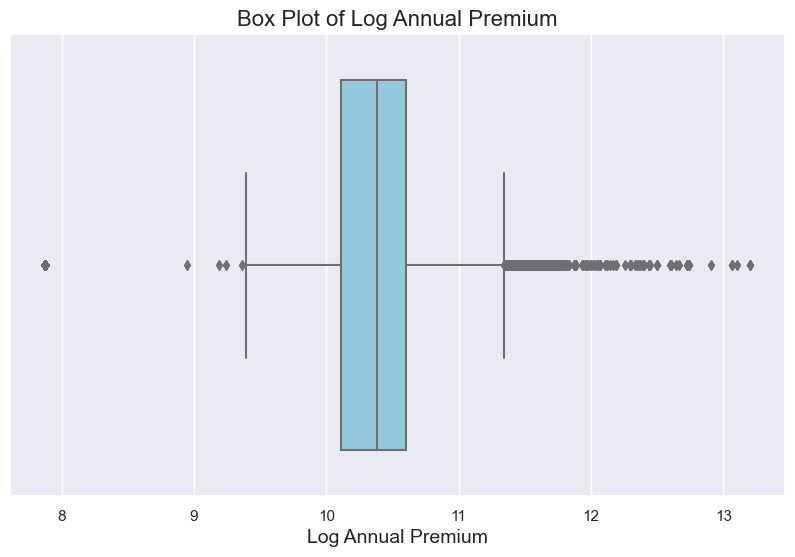

In [63]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the box plot for the log-transformed Annual Premium
sns.boxplot(x=final_df['Log_Annual_Premium'], color='skyblue')

# Add title and labels
plt.title('Box Plot of Log Annual Premium', fontsize=16)
plt.xlabel('Log Annual Premium', fontsize=14)

# Display the plot
plt.show()

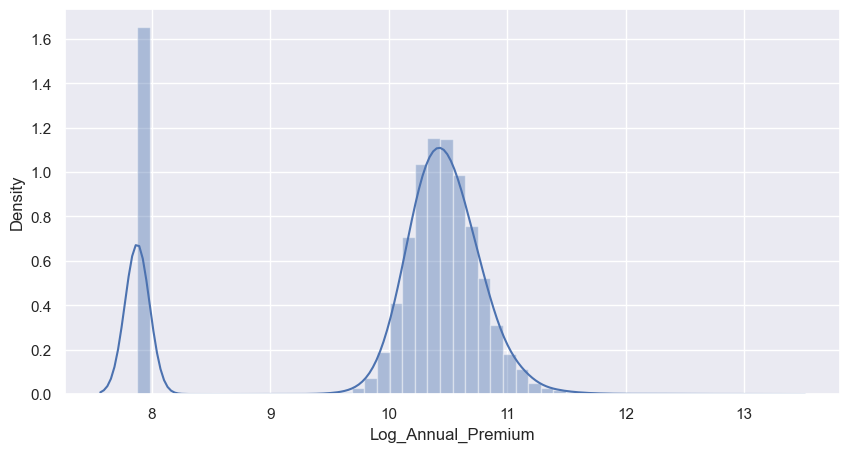

In [65]:
# Ploting a Distibution Plot for Annual_Premium
plt.figure(figsize=(10,5))
Annual_Premium_plot = sns.distplot(final_df.Log_Annual_Premium)

## We will examine the highest correlated attributes and eliminate attributes that are not contributing more to the information gain

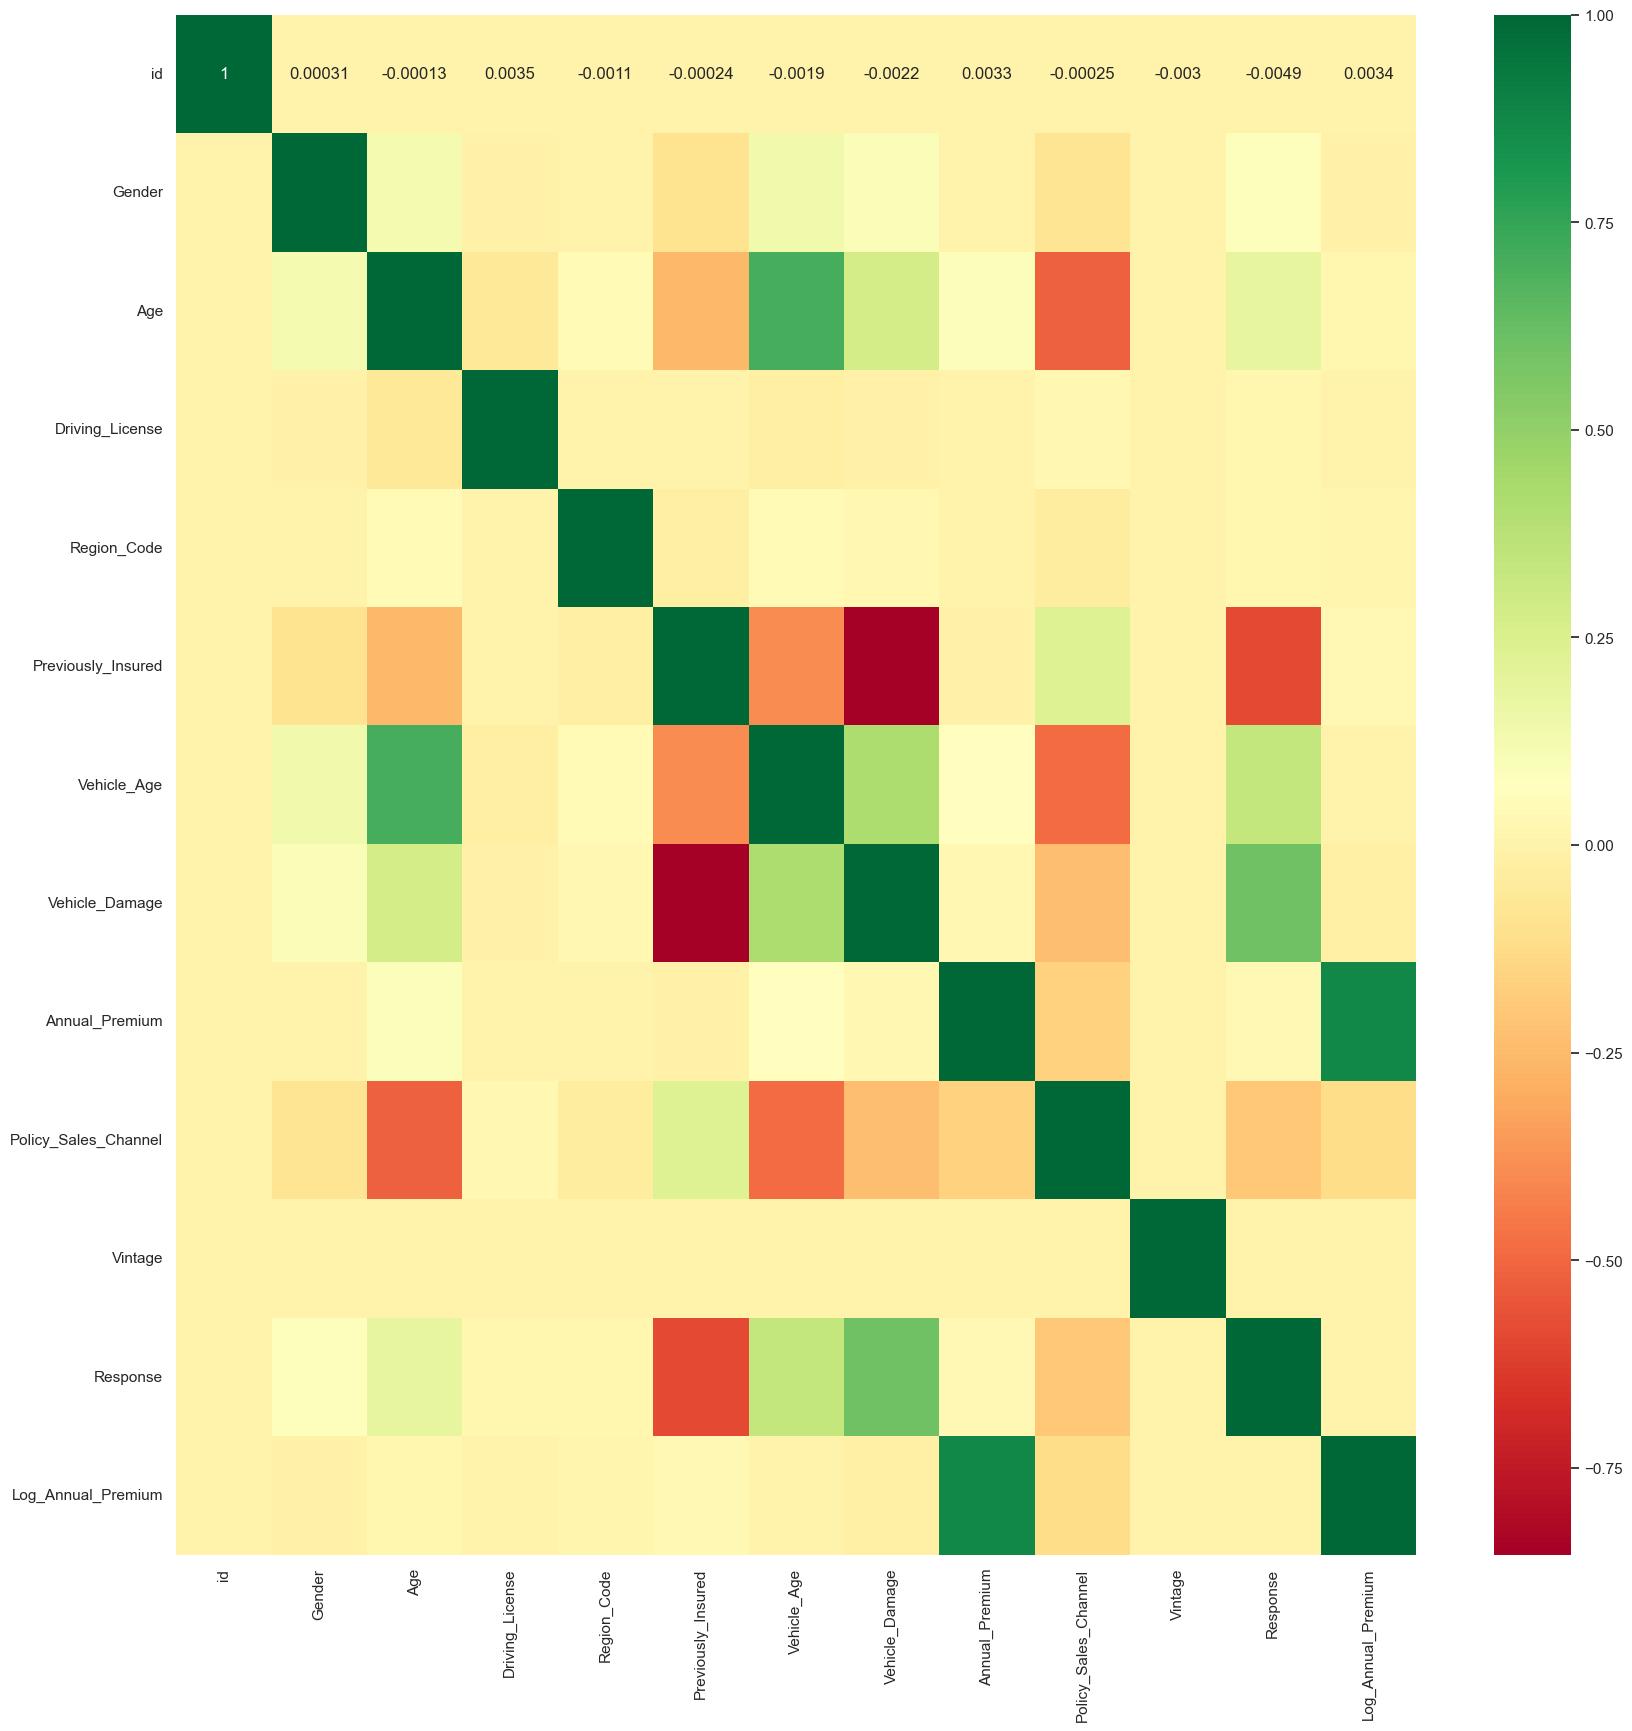

In [68]:
corrmat = final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [70]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [72]:
correlation(final_df, 0.6)

{'Log_Annual_Premium', 'Vehicle_Age', 'Vehicle_Damage'}

In [74]:
final_df = final_df.drop(['Vehicle_Damage'],axis = 1)

In [78]:
final_df = final_df.drop(['Annual_Premium'],axis = 1)

## We are removing Vehicle damage because it is highly correlated with two other attributes(vehicle_age and previously_insured) to avoid multicollinearity

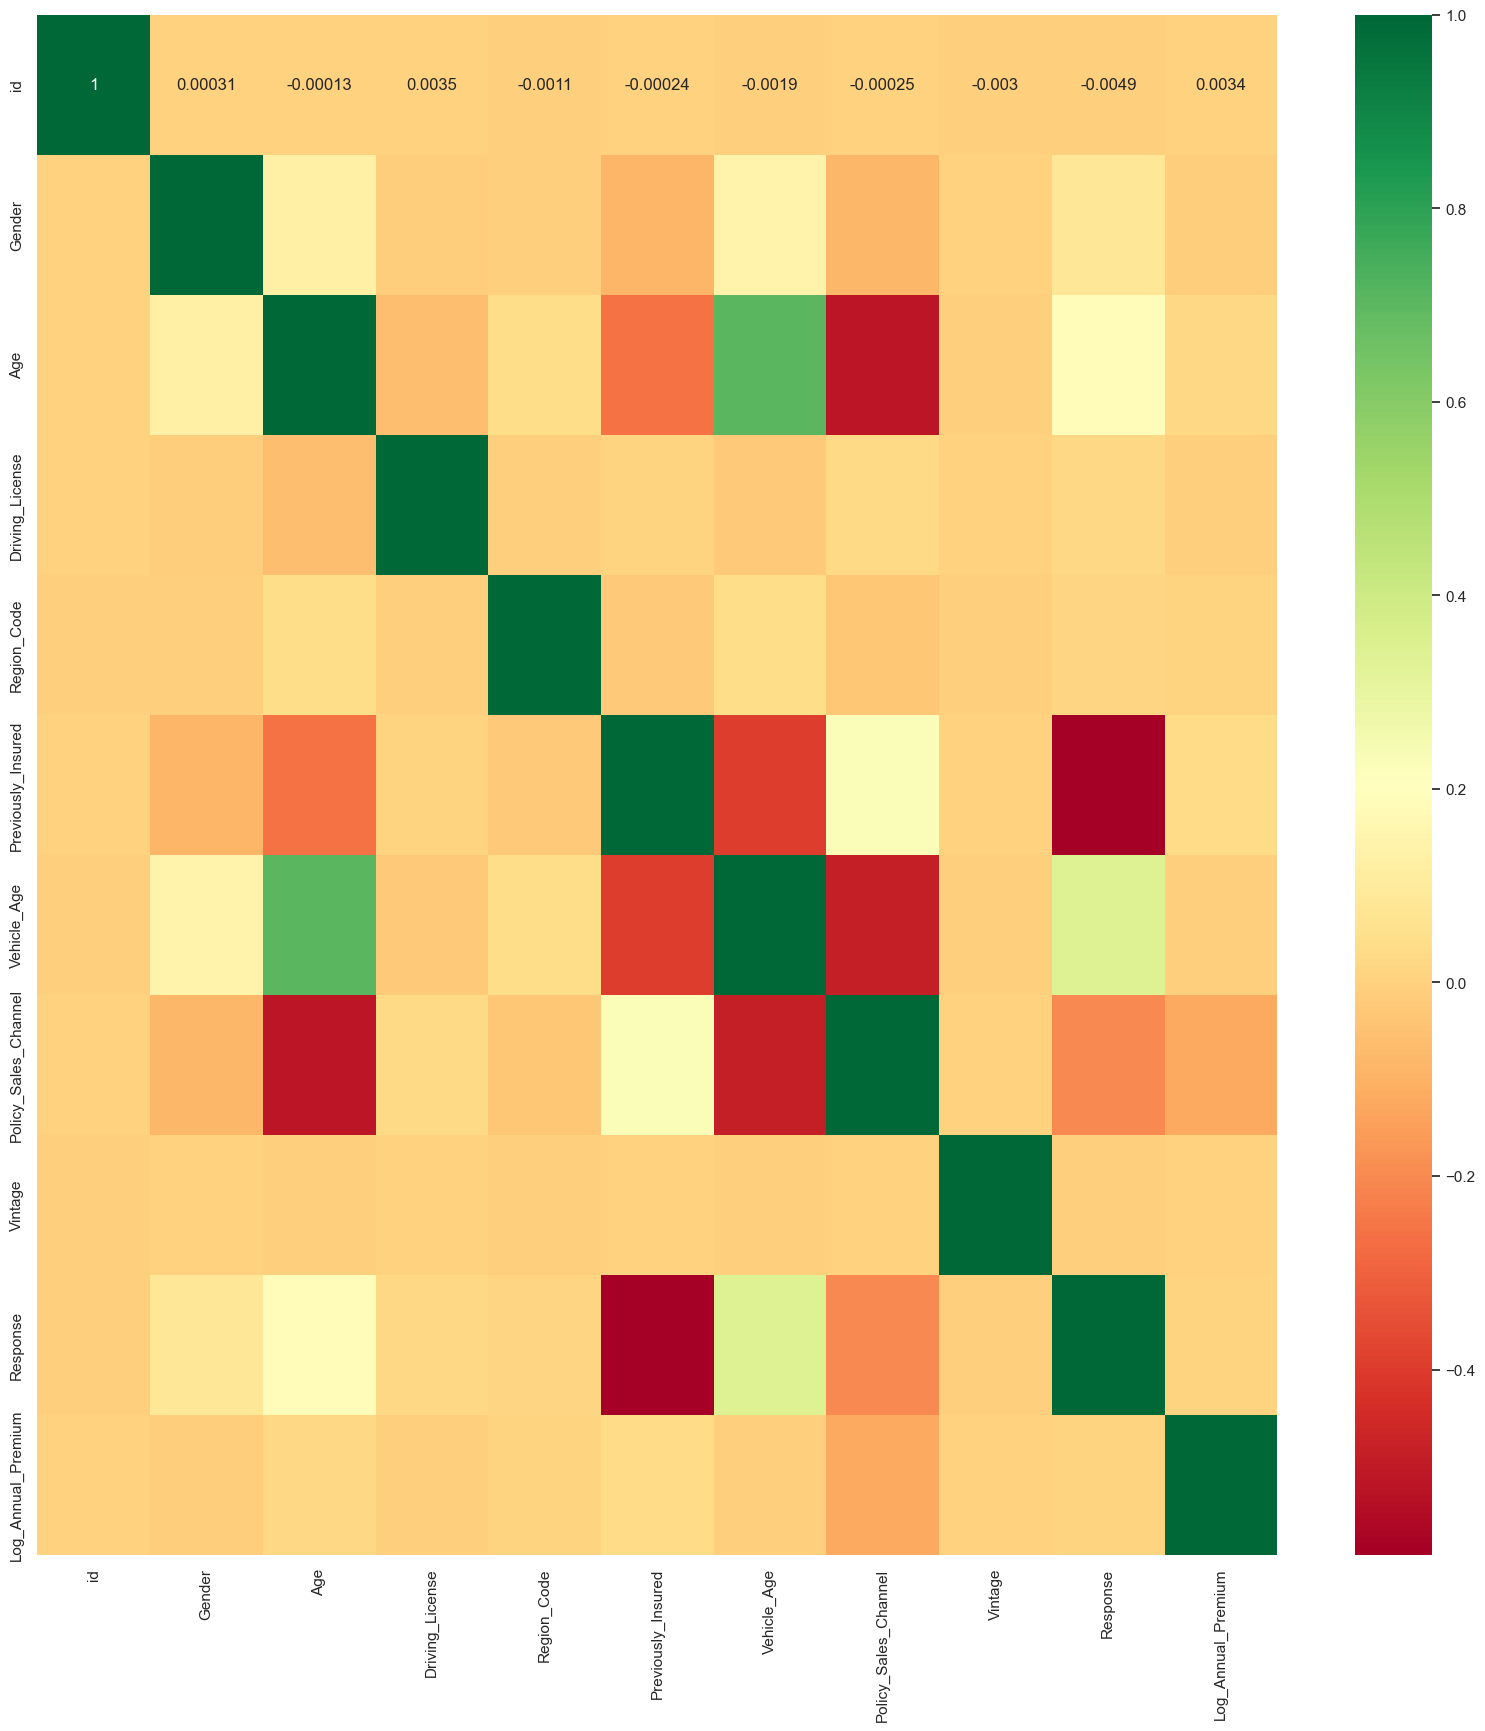

In [82]:
corrmat = final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [84]:
final_df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Policy_Sales_Channel,Vintage,Response,Log_Annual_Premium
125327,125328,1,56,1,29,0,1,157,49,1,7.874739
255322,255323,1,30,1,29,1,0,152,122,0,9.987277
105983,105984,0,28,1,28,0,0,26,82,1,10.793701
326219,326220,1,38,1,28,0,1,109,197,1,10.717435
16808,16809,1,42,1,12,0,1,155,298,0,10.108874
303688,303689,1,59,1,28,0,1,26,61,1,10.416072
327634,327635,1,31,1,14,0,0,124,293,0,10.271389
325274,325275,1,53,1,28,0,1,26,150,1,11.026158
235084,235085,0,43,1,28,0,1,124,21,0,10.580709
319560,319561,1,56,1,41,0,1,154,121,1,10.501692


## Previously Insured Variable

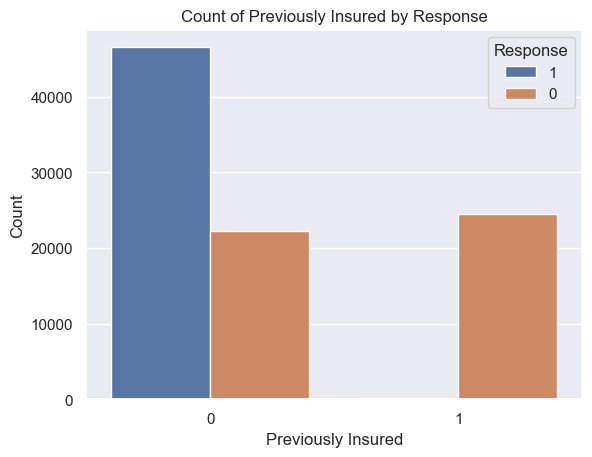

In [87]:
sns.countplot(x='Previously_Insured', hue='Response', data=final_df)

# Add labels and title for better visualization
plt.xlabel('Previously Insured')
plt.ylabel('Count')
plt.title('Count of Previously Insured by Response')

# Show the plot
plt.show()

## Train:Validate is 70:30 split

In [90]:
y = final_df.Response
X = final_df.drop(['Response'],axis = 1,inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

## Step 4: Predictive modeling - ML Algorithms
--------------------------------------------------------------------------------------------------------
Developing
- Logistic Regression,
- Random Forest Classifier
- Decision Tree Classifier
  
and compare them

In [95]:
pipeline = {
    'LogisticRegression': make_pipeline(StandardScaler(), LogisticRegression()),
    'DecisionTreeClassifier': make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=0)),
    'RandomForestClassifier': make_pipeline(StandardScaler(), RandomForestClassifier()),
}

In [98]:
fit_model = {}
for algo,pipelines in pipeline.items():
    model = pipelines.fit(X_train,y_train)
    fit_model[algo] = model
    score = []
    names = []
    dds = []
    for algo,model in fit_model.items():
        yhat = model.predict(X_test)
        names.append(algo)
        score.append(accuracy_score(y_test, yhat))
result= pd.DataFrame(names,columns = ['Name'])
result['Score'] = score
result

,Name,Score
0,LogisticRegression,0.761364
1,DecisionTreeClassifier,0.703418
2,RandomForestClassifier,0.778099


In [100]:
for names,value in pipeline.items():
    model = value.fit(X_train,y_train)
    preds = model.predict(X_test)
    print(" ")
    print(names)
    print('-'*len(names))
    print(' ')
    print(classification_report(y_test, preds))
    print(' ')
    print('_'*55)

 
LogisticRegression
------------------
 
              precision    recall  f1-score   support

           0       0.98      0.54      0.69     14007
           1       0.68      0.99      0.81     14019

    accuracy                           0.76     28026
   macro avg       0.83      0.76      0.75     28026
weighted avg       0.83      0.76      0.75     28026

 
_______________________________________________________
 
DecisionTreeClassifier
----------------------
 
              precision    recall  f1-score   support

           0       0.70      0.71      0.71     14007
           1       0.71      0.70      0.70     14019

    accuracy                           0.70     28026
   macro avg       0.70      0.70      0.70     28026
weighted avg       0.70      0.70      0.70     28026

 
_______________________________________________________
 
RandomForestClassifier
----------------------
 
              precision    recall  f1-score   support

           0       0.85      0.67

## Conclusion

## RandomForestClassifier has the highest Classification Accuracy score among the classifiers listed above.
## The Random Forest model offers a robust solution for predicting customer responses, balancing precision and recall effectively for both positive and negative classes.

